# Notebook 5C Data Cleaning and Auto ML applied to College Entrance Data

Conceptualized, organized and prepared by: Christopher Monterola



# Example 2:  College Exam Prediction

Given here are actual class performance of students who took the UP College Admission Test (UPCAT) of a school based in Metro Manila. Information contains the grades of each of the students in English, Math, Science together with their general weighted averages from grades 7-9. An IQ test conducted by the school is also made available together with a confidentially measured variable abbreviated as SA.  

Explore how accurate can k-NN, Logistic regression and Linear Support Vector Machine can forecast UPCAT passers (pass=1, fail=0). Determine the optimal parameter for each method and the top predictors. 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
#warnings.filterwarnings("ignore", category=DataConversionWarning)

#from warnings import simplefilter
#from sklearn.exceptions import ConvergenceWarning
#simplefilter("ignore", category=ConvergenceWarning)


In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
data_dir = ''

In [8]:
df_UPCAT = pd.read_excel(data_dir+'UPCAT_DATA2(1).xlsx', sheet_name='AllData')
dummy = df_UPCAT
dummy.head()

,Batch,Eng7,Eng8,Eng9,Math7,Math8,Math9,Sci7,Sci8,Sci9,GWA7,GWA8,GWA9,UP,IQ,SA,C1,C2,Target
0,2005,77,82.0,86,94,87,92.0,84,80,92,1.4764,1.5045,1.4098,1,55.0,28,1,4.0,1
1,2005,57,57.0,59,55,46,57.0,53,45,53,2.6557,2.7000,2.7008,1,38.0,19,5,3.0,0
2,2005,55,52.0,55,57,53,51.0,57,62,51,2.6132,2.6818,2.7172,0,17.0,9,5,6.0,0
3,2005,69,78.0,78,87,79,79.0,83,82,79,1.7217,1.6136,1.7049,1,45.0,28,1,4.0,0
4,2005,64,71.0,68,71,57,54.0,60,59,55,2.4245,2.4318,2.4713,1,67.0,56,1,5.0,0


In [9]:
print(df_UPCAT.shape)

(1010, 19)


In [10]:
df_UPCAT.columns

Index(['Batch', 'Eng7', 'Eng8', 'Eng9', 'Math7', 'Math8', 'Math9', 'Sci7',
       'Sci8', 'Sci9', 'GWA7', 'GWA8', 'GWA9', 'UP', 'IQ', 'SA', 'C1', 'C2',
       'Target'],
      dtype='object')

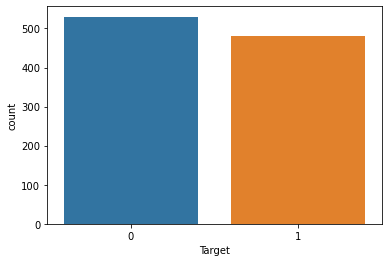

In [11]:
import seaborn as sns
sns.countplot(df_UPCAT['Target'],label="Count")
plt.show()

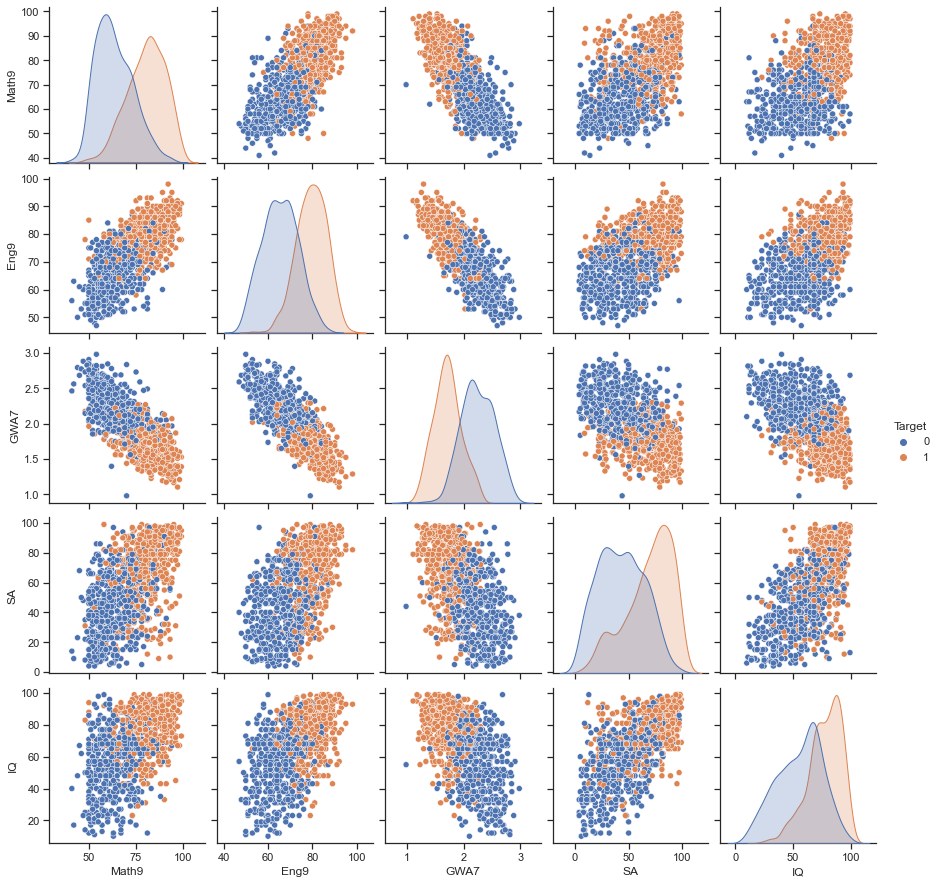

In [12]:
import seaborn as sns
sns.set(style="ticks")

df = df_UPCAT[['Math9', 'Eng9','GWA7','SA','IQ','Target']]
sns.pairplot(df, hue="Target", diag_kind='kde')

pass

In [13]:
num=(df_UPCAT.groupby('Target').size()/df_UPCAT.groupby('Target').size().sum())**2
#print("Population per class: {}\n".format(df_state))
print("Proportion Chance Criterion = {}%".format(100*num.sum()))
print("1.25*Proportion Chance Criterion = {}%".format(1.25*100*num.sum()))

Proportion Chance Criterion = 50.12253700617586%
1.25*Proportion Chance Criterion = 62.653171257719826%


# Step 1: Look at the missing values

In [14]:
df_UPCAT.isnull().sum()

Batch     0
Eng7      0
Eng8      1
Eng9      0
Math7     0
Math8     0
Math9     1
Sci7      0
Sci8      0
Sci9      0
GWA7      0
GWA8      0
GWA9      1
UP        0
IQ        1
SA        0
C1        0
C2        2
Target    0
dtype: int64

# Steps 2 and 3. Remove or Imput the missing values

In [15]:
import pandas as pd
import numpy as np

from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)



X_transition = pd.DataFrame(df_UPCAT)
X_clean = DataFrameImputer().fit_transform(X_transition)

X_clean.isnull().sum()

Batch     0
Eng7      0
Eng8      0
Eng9      0
Math7     0
Math8     0
Math9     0
Sci7      0
Sci8      0
Sci9      0
GWA7      0
GWA8      0
GWA9      0
UP        0
IQ        0
SA        0
C1        0
C2        0
Target    0
dtype: int64

In [16]:
X_clean.head()

,Batch,Eng7,Eng8,Eng9,Math7,Math8,Math9,Sci7,Sci8,Sci9,GWA7,GWA8,GWA9,UP,IQ,SA,C1,C2,Target
0,2005,77,82.0,86,94,87,92.0,84,80,92,1.4764,1.5045,1.4098,1,55.0,28,1,4.0,1
1,2005,57,57.0,59,55,46,57.0,53,45,53,2.6557,2.7000,2.7008,1,38.0,19,5,3.0,0
2,2005,55,52.0,55,57,53,51.0,57,62,51,2.6132,2.6818,2.7172,0,17.0,9,5,6.0,0
3,2005,69,78.0,78,87,79,79.0,83,82,79,1.7217,1.6136,1.7049,1,45.0,28,1,4.0,0
4,2005,64,71.0,68,71,57,54.0,60,59,55,2.4245,2.4318,2.4713,1,67.0,56,1,5.0,0


In [17]:
X_clean = X_clean.drop('Target', axis=1)

# Step 4. Handle Categorical Data, for simplicity let's just One Hat Encode all the categorical values

None, all data are numerical.

# Step 5: Apply Scaler

In [18]:
X_column_names =X_clean.columns

In [19]:
from sklearn.preprocessing import MinMaxScaler
sscaler = MinMaxScaler()
XX = sscaler.fit_transform(X_clean.astype(np.float)) #You will loss the column names

<ipython-input-19-b2b2a75f1c40>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  XX = sscaler.fit_transform(X_clean.astype(np.float)) #You will loss the column names


In [20]:
XX_df = pd.DataFrame(data = XX,columns = X_column_names) # Return the column names
XX_df.head()

,Batch,Eng7,Eng8,Eng9,Math7,Math8,Math9,Sci7,Sci8,Sci9,GWA7,GWA8,GWA9,UP,IQ,SA,C1,C2
0,0.0,0.634615,0.772727,0.764706,0.915254,0.793103,0.879310,0.695652,0.80,0.862069,0.248150,0.000238,0.003870,0.5,0.505618,0.252632,0.0,0.375
1,0.0,0.250000,0.393939,0.235294,0.254237,0.086207,0.275862,0.021739,0.45,0.189655,0.837682,0.000896,0.026550,0.5,0.314607,0.157895,0.5,0.250
2,0.0,0.211538,0.318182,0.156863,0.288136,0.206897,0.172414,0.108696,0.62,0.155172,0.816437,0.000886,0.026838,0.0,0.078652,0.052632,0.5,0.625
3,0.0,0.480769,0.712121,0.607843,0.796610,0.655172,0.655172,0.673913,0.82,0.637931,0.370776,0.000298,0.009054,0.5,0.393258,0.252632,0.0,0.375
4,0.0,0.384615,0.606061,0.411765,0.525424,0.275862,0.224138,0.173913,0.59,0.224138,0.722106,0.000748,0.022518,0.5,0.640449,0.547368,0.0,0.500


# Step 6:  Now let's run an automated Machine Learning to the above processed data

Below we combine the notebook codes previously shared into a single running code to create an **Automated ML**

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

Number_trials=20

def train_knn(X, y):
    score_train = []
    score_test = []

    for seed in range(Number_trials):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        neighbors_settings = range(1,70)
        acc_train = []
        acc_test = []

        for n_neighbors in neighbors_settings:   
            clf = KNeighborsClassifier(n_neighbors=n_neighbors) # build the model 
            clf.fit(X_train, y_train)    
            acc_train.append(clf.score(X_train, y_train))
            acc_test.append(clf.score(X_test, y_test))

        score_train.append(acc_train)
        score_test.append(acc_test)   
        
    score = np.mean(score_test, axis=0)
    run_time = (time.time() - start_time)
    return ['kNN', np.amax(score), 'N_Neighbor = {0}'.format(np.argmax(score)+1), 'NA',run_time]

def train_logistic(X, y, reg):
    C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]
    #C = [.01, .1]
    score_train = []
    score_test = []
    weighted_coefs=[]
    
    for seed in range(Number_trials):
        training_accuracy = []  
        test_accuracy = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        for alpha_run in C:
            if reg == 'l1':
                lr = LogisticRegression(C=alpha_run, penalty=reg, solver='liblinear').fit(X_train, y_train)
            if reg == 'l2':
                lr = LogisticRegression(C=alpha_run, penalty=reg, dual=False).fit(X_train, y_train)
            
            
            training_accuracy.append(lr.score(X_train, y_train))
            test_accuracy.append(lr.score(X_test, y_test))
            coefs=lr.coef_ 
            weighted_coefs.append(coefs) #append all the computed coefficients per trial
                
        score_train.append(training_accuracy)
        score_test.append(test_accuracy)
    
    mean_coefs=np.mean(weighted_coefs, axis=0) #get the mean of the weighted coefficients over all the trials 
    #print(mean_coefs) 
    score = np.mean(score_test, axis=0)
    
    #Plot the weight of the parameters 
    top_predictor=X.columns[np.argmax(np.abs(mean_coefs))]
    abs_mean_coefs = np.abs(mean_coefs[0,:])
    coefs_count = len(abs_mean_coefs)
    fig, ax = plt.subplots(figsize=(3,7))
    ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
     
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])
    
    run_time = (time.time() - start_time)
    return ['Logistic ({0})'.format(reg), np.amax(score), \
            'C = {0}'.format(C[np.argmax(score)]), top_predictor, run_time]

def train_svm(X, y, reg):
    C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]
    #C = [.01, .1]
    score_train = []
    score_test = []
    weighted_coefs=[]
    
    for seed in range(Number_trials):
        training_accuracy = []  
        test_accuracy = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        for alpha_run in C:
            if reg == 'l1':
                svc = LinearSVC(C=alpha_run, penalty=reg, loss='squared_hinge', dual=False).fit(X_train, y_train)
            if reg == 'l2':
                svc = LinearSVC(C=alpha_run, penalty=reg).fit(X_train, y_train)
            training_accuracy.append(svc.score(X_train, y_train))
            test_accuracy.append(svc.score(X_test, y_test))
           # if alpha_run == 0.01:
            coefs = svc.coef_
            weighted_coefs.append(coefs)
                
        score_train.append(training_accuracy)
        score_test.append(test_accuracy)
 

    mean_coefs=np.mean(weighted_coefs, axis=0) #get the mean of the weighted coefficients over all the trials       
    score = np.mean(score_test, axis=0)
    

    top_predictor=X.columns[np.argmax(np.abs(mean_coefs))]
    abs_mean_coefs = np.abs(mean_coefs[0,:])
    coefs_count = len(abs_mean_coefs)
    fig, ax = plt.subplots(figsize=(3,7))
    ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
        
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])
    
    run_time = (time.time() - start_time)
    return ['Linear SVM ({0})'.format(reg), np.amax(score), \
            'C = {0}'.format(C[np.argmax(score)]), top_predictor,run_time]



['kNN', 0.8794466403162055, 'N_Neighbor = 31', 'NA', 79.19316744804382]
79.19316744804382 seconds
['Logistic (l2)', 0.8816205533596836, 'C = 1.5', 'Eng9', 6.668400287628174]
6.668400287628174 seconds
['Logistic (l1)', 0.8792490118577074, 'C = 3', 'GWA8', 16.184887886047363]
16.184887886047363 seconds
['Linear SVM (l2)', 0.8806324110671937, 'C = 0.2', 'Eng9', 5.142547130584717]
5.142547130584717 seconds
['Linear SVM (l1)', 0.8776679841897235, 'C = 300', 'GWA8', 7.808990955352783]
7.808990955352783 seconds


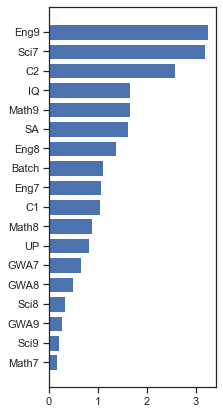

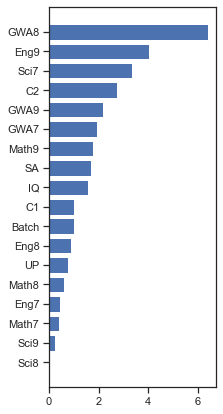

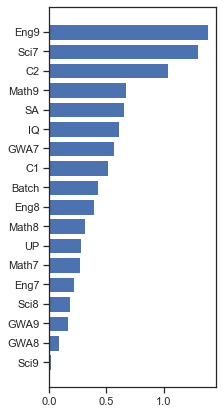

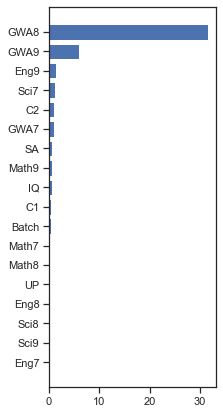

In [22]:
X = XX_df

y = df_UPCAT['Target']

import time

start_time = time.time()
a = train_knn(X,y)
print(a)
print("%s seconds" % a[4])

start_time = time.time()
b = train_logistic(X,y,reg='l2')
print(b)
print("%s seconds" % b[4])

start_time = time.time()
c = train_logistic(X,y,reg='l1')
print(c)
print("%s seconds" % c[4])

start_time = time.time()
d = train_svm(X,y,reg='l2')
print(d)
print("%s seconds" % d[4])

start_time = time.time()
e = train_svm(X,y,reg='l1')
print(e)
print("%s seconds" % e[4])




In [23]:
cols = ['Machine Learning Method', 'Test Accuracy', 'Best Parameter', 'Top Predictor Variable', 'Run Time']
df2 = pd.DataFrame(columns=cols)

df2.loc[0] = a
df2.loc[1] = b
df2.loc[2] = c
df2.loc[3] = d
df2.loc[4] = e


df2

,Machine Learning Method,Test Accuracy,Best Parameter,Top Predictor Variable,Run Time
0,kNN,0.879447,N_Neighbor = 31,NA,79.193167
1,Logistic (l2),0.881621,C = 1.5,Eng9,6.668400
2,Logistic (l1),0.879249,C = 3,GWA8,16.184888
3,Linear SVM (l2),0.880632,C = 0.2,Eng9,5.142547
4,Linear SVM (l1),0.877668,C = 300,GWA8,7.808991


# Step 7: How to save the weights 

Many ways to save it, you can use **joblib** (you can also use **cPickle**, **dill**)

### Step 1: Load Data

In [24]:
from sklearn.model_selection import train_test_split

X = XX_df
y = df_UPCAT['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### Step 2: Train a given ML model (here we are using Random Forest)

In [25]:
import joblib
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_features=0.4)
rf.fit(X_train, y_train)

# save
joblib.dump(rf, "my_random_forest.joblib")

['my_random_forest.joblib']

### Step 3: Access the weight without retraining again, Step 2 can be skipped after the first run

In [26]:
import joblib

# load
loaded_rf = joblib.load("my_random_forest.joblib")
loaded_rf.predict(X_test)

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [27]:
loaded_rf.score(X_test, y_test)

0.8814229249011858